In [8]:
import pandas as pd
import xarray as xr
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [10]:
ir_sb_20 = xr.open_zarr("/Users/u1321700/ipynb/SW_compare/wy2020/irwin/iSnobal.zarr")
ir_sb_19 = xr.open_zarr("/Users/u1321700/ipynb/SW_compare/wy2019/irwin/iSnobal.zarr")
ir_sm_20 = xr.open_zarr("/Users/u1321700/ipynb/SW_compare/wy2020/irwin/SMRF.zarr")
ir_sm_19 = xr.open_zarr("/Users/u1321700/ipynb/SW_compare/wy2019/irwin/SMRF.zarr")

In [21]:
    # TZ in MDT. 
df = pd.read_csv('Irwin_raw/Irwin_WY20.csv',
                 skiprows=[0,1,2,3,4,5,7],
                 na_values=['NAN','NA','N/A','NaN'])


dfr = df.iloc[:,15:20]
dfr['Timestamp'] = pd.to_datetime(dfr['Unnamed: 15'])
dfr.index = dfr['Timestamp']
    # set time zone then convert to UTC and drop tz identifier
dfr = dfr.tz_localize(tz='Etc/GMT-7')
dfr = dfr.tz_convert(None)

In [22]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8870 entries, 2019-09-30 17:00:00 to NaT
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unnamed: 15                6622 non-null   object        
 1   Incoming) Solar_Wm2_1_Avg  6604 non-null   float64       
 2   Incoming_NIR_Wm2_2_Avg     6616 non-null   float64       
 3   Outgoing_Solar_Wm2_3_Avg   6616 non-null   float64       
 4   Outoging_NIR_Wm2_4_Avg     6616 non-null   float64       
 5   Timestamp                  6622 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 485.1+ KB


In [23]:
dfr['net_solar_ir'] = dfr['Incoming) Solar_Wm2_1_Avg'] - dfr['Outgoing_Solar_Wm2_3_Avg']
dfr['albedo'] = dfr['Outgoing_Solar_Wm2_3_Avg'] / dfr['Incoming) Solar_Wm2_1_Avg']
dfr['albedo'] = dfr['albedo'].mask(dfr['albedo'] < 0, np.nan)

In [24]:
# mask out albedo when sun is down
dfr['albedo'] = dfr['albedo'].mask(dfr['Incoming) Solar_Wm2_1_Avg'] <= 0, np.nan)

<AxesSubplot:xlabel='Timestamp'>

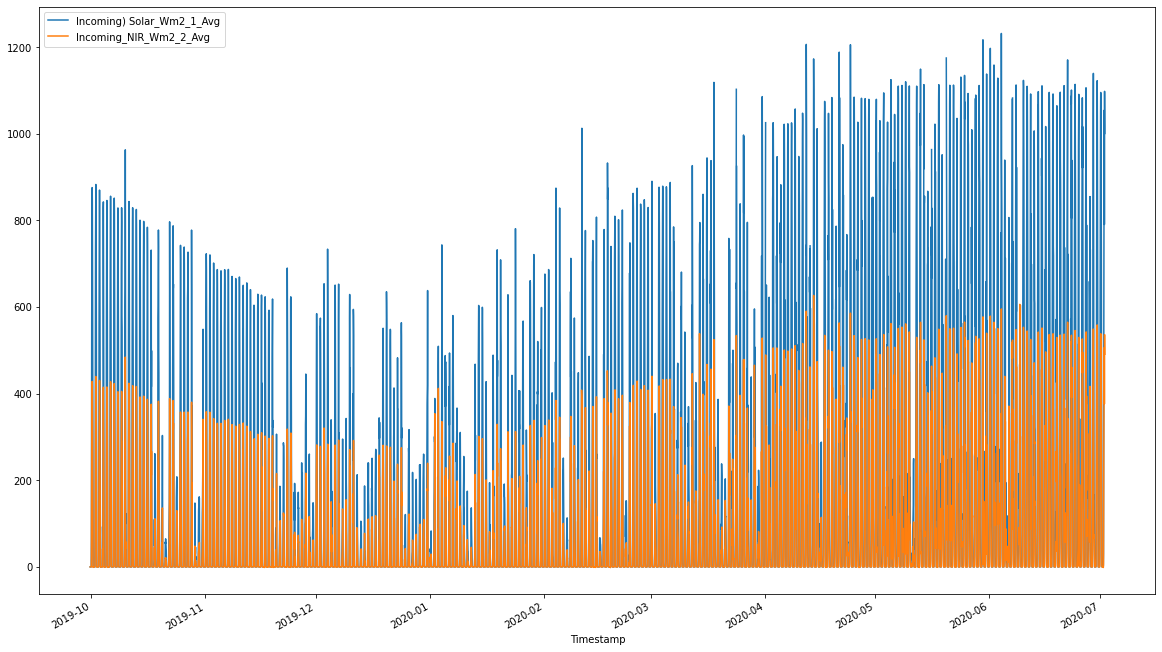

In [23]:
dfr[['Incoming) Solar_Wm2_1_Avg','Incoming_NIR_Wm2_2_Avg']].plot(figsize=(20,12))

Net solar radiation measured at Irwin


In [11]:
irsb_df = ir_sb_20['net_rad'].to_dataframe()

In [12]:
#irsb_df = irsb_df.append(ir_sb_19['net_rad'].to_dataframe())

In [13]:
irsm_df = ir_sm_20[['net_solar','albedo_vis']].to_dataframe()

In [14]:
irsm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2019-10-01 23:00:00 to 2020-09-30 23:00:00
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   net_solar   366 non-null    float32
 1   albedo_vis  366 non-null    float32
 2   x           366 non-null    float32
 3   y           366 non-null    float32
dtypes: float32(4)
memory usage: 8.6 KB


In [9]:
#irsm_df = irsm_df.append(ir_sm_19['net_solar'].to_dataframe())

In [15]:
dfr = dfr.loc[:'20200702']

In [16]:
df_n = pd.concat([irsm_df, dfr])
df_n = df_n.sort_index()

df_out = df_n.rename(columns={'net_solar':'net_solar_SMRF',
                             'net_solar_ir':'net_solar_irwin',
                             'albedo':'albedo_irwin',
                             'albedo_vis':'albedo_vis_SMRF'})

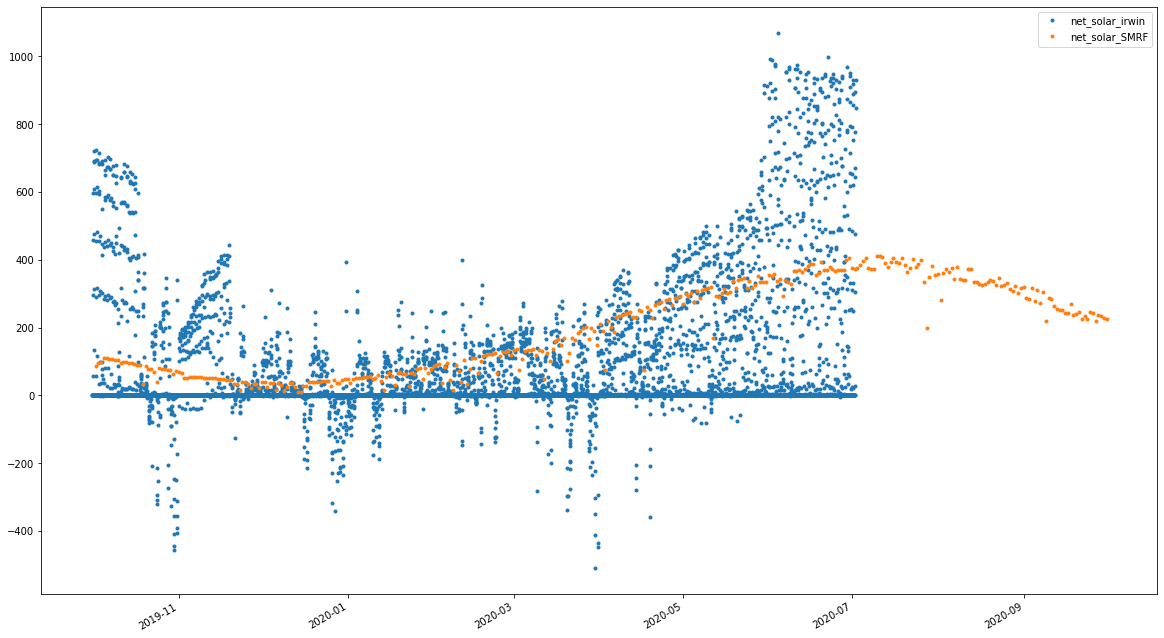

In [17]:
ax = df_out[['net_solar_irwin','net_solar_SMRF']].plot(sharex=True, figsize=(20,12), style=".")
fig = ax.get_figure()

#plt.savefig('plots/shortwave_compare_shade.png', dpi=150, edgecolor='white', facecolor='white')

Comparison of net solar from Irwin and SMRF. WY2020

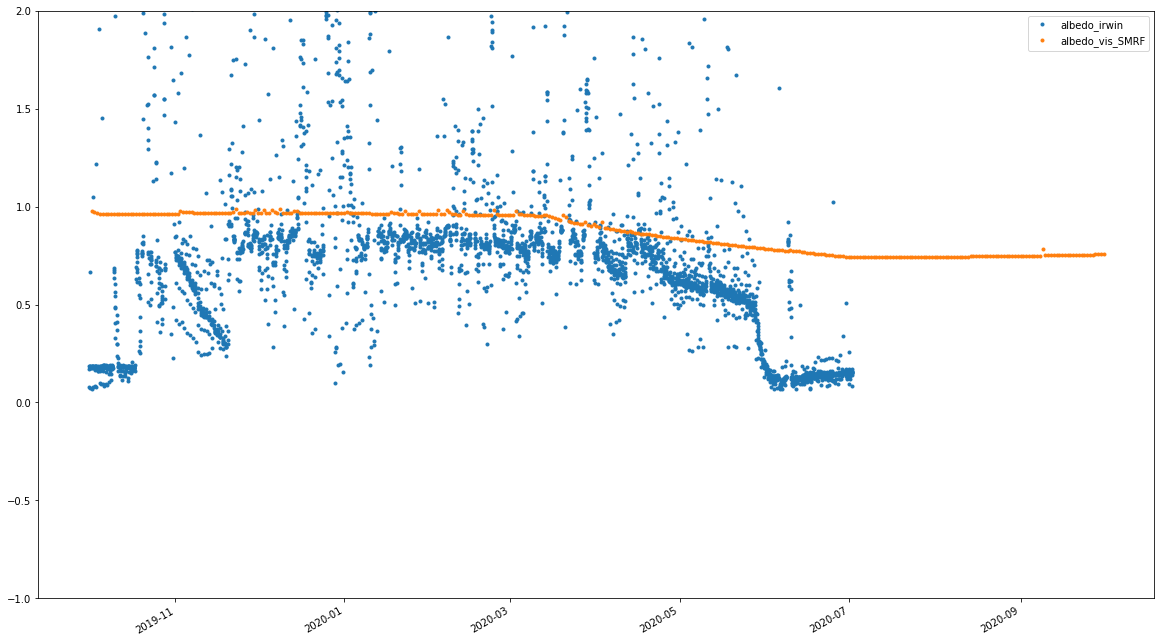

In [25]:
ax2 = df_out[['albedo_irwin','albedo_vis_SMRF']].plot(ylim=(-1, 2), figsize=(20,12), style=".")
fig = ax2.get_figure()

vis albedo from Iwin and SMRF